# ASSIGNMENT 1: SUPERVISED AND UNSUPERVISED LEARNING
This assignment will cover the various models taught in class that are regularly used for supervised and unsupervised learning.

Recall that Supervised Learning is the paradigm of machine learning that makes use of data labels for training, along with the data features, while  unsupervised relies only on data features.


**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [1]:
import pandas as pd

## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.
- Classification: The output labels are discrete in nature.

We'll begin with classification. Recall some of the models taught for the same- **Logistic Regression, Support Vector Machine, KNN, Naive Bayes, Decision Trees and Random Forests**

### BINARY CLASSIFICATION

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kukkuyouseff19ma118/nba-logreg")

print("Path to dataset files:", path)

100%|██████████| 44.7k/44.7k [00:00<00:00, 34.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kukkuyouseff19ma118/nba-logreg/versions/1


In [3]:
import os

dir_path = "/root/.cache/kagglehub/datasets/kukkuyouseff19ma118/nba-logreg/versions/1/"
print(os.listdir(dir_path))


['nba_logreg.csv']


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [4]:
import pandas as pd

data = pd.read_csv("/root/.cache/kagglehub/datasets/kukkuyouseff19ma118/nba-logreg/versions/1/nba_logreg.csv")
data.head()


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [5]:
print(data.shape)

(1340, 21)


**What are the columns?**

In [8]:
print(data.columns)

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')


**What does the beginning of the dataset look like?**

In [9]:
print(data.head())

              Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   

   FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0  

[5 rows x 21 columns]


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [6]:
data=data.dropna()

**What is the shape of the dataframe now?**

In [7]:
print(data.shape)

(1329, 21)


Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [8]:
lables=data.columns.tolist()
lables.remove('TARGET_5Yrs')
lables.remove('Name')
X_train=data[lables]
y_train=data['TARGET_5Yrs']

In [12]:
print(X_train.shape)
print(y_train.shape)

(1329, 19)
(1329,)


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [13]:
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of test labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


**Now load the sklearn module that allows the creation of a logistic regression model.**

In [21]:
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [22]:
model = LogisticRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


**Now test on the testing dataframe and print all of these metrics.**

In [24]:

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print("Accuracy is ", accuracy)
print("F1 score is ", f1)
print("Precision is ", precision)
print("Recall is ", recall)

Accuracy is  0.7518796992481203
F1 score is  0.8135593220338984
Precision is  0.8089887640449438
Recall is  0.8181818181818182


Accuracy of the model is: 0.6992481203007519
F1 score of the model is: 0.7727272727272728
Precision of the model is: 0.7513812154696132
Recall of the model is: 0.7953216374269005


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [ ]:
from sklearn.svm import SVC

**Just as we had before, load and fit a model on our training dataset.**

In [ ]:
svc_model = SVC()

svc_model.fit(X_train, y_train)

SVC()

SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [ ]:

y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print("Accuracy is ", accuracy)
print("F1 score is ", f1)
print("Precision is ", precision)
print("Recall is ", recall)

Accuracy is  0.7443609022556391
F1 score is  0.8131868131868133
Precision is  0.7872340425531915
Recall is  0.8409090909090909


Accuracy of the model is: 0.7030075187969925
F1 score of the model is: 0.7835616438356164
Precision of the model is: 0.7371134020618557
Recall of the model is: 0.8362573099415205


### REGRESSION


**Import the csv `IPL 2022 Batters.csv` as a pandas dataframe.**

In [49]:
import pandas as pd

In [51]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jkanthony/ipl-2022-batters-stats")

print("Path to dataset files:", path)


100%|██████████| 4.01k/4.01k [00:00<00:00, 6.94MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jkanthony/ipl-2022-batters-stats/versions/1


In [53]:
import os

dir_path = "/root/.cache/kagglehub/datasets/jkanthony/ipl-2022-batters-stats/versions/1"
print(os.listdir(dir_path))


['IPL 2022 Batters.csv']


In [54]:
import pandas as pd

data = pd.read_csv("/root/.cache/kagglehub/datasets/jkanthony/ipl-2022-batters-stats/versions/1/IPL 2022 Batters.csv")
data.head()


,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,Jos Buttler,17,17,2,863,116,57.53,579,149.05,4,4,83
1,K L Rahul,15,15,3,616,103*,51.33,455,135.38,2,4,45
2,Quinton De Kock,15,15,1,508,140*,36.29,341,148.97,1,3,47
3,Hardik Pandya,15,15,4,487,87*,44.27,371,131.26,0,4,49
4,Shubman Gill,16,16,2,483,96,34.5,365,132.32,0,4,51


**First things first, analyze the data**

In [55]:
print(data.head())

            Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  50  4s
0      Jos Buttler   17    17   2   863   116  57.53  579  149.05    4   4  83
1        K L Rahul   15    15   3   616  103*  51.33  455  135.38    2   4  45
2  Quinton De Kock   15    15   1   508  140*  36.29  341  148.97    1   3  47
3    Hardik Pandya   15    15   4   487   87*  44.27  371  131.26    0   4  49
4     Shubman Gill   16    16   2   483    96   34.5  365  132.32    0   4  51


Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100',
       '50', '4s'],
      dtype='object')

**Use a function to find out about the datatypes of the features**

In [56]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Mat     162 non-null    int64  
 2   Inns    162 non-null    int64  
 3   NO      162 non-null    int64  
 4   Runs    162 non-null    int64  
 5   HS      162 non-null    object 
 6   Avg     162 non-null    object 
 7   BF      162 non-null    int64  
 8   SR      162 non-null    float64
 9   100     162 non-null    int64  
 10  50      162 non-null    int64  
 11  4s      162 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.3+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Mat     162 non-null    int64  
 2   Inns    162 non-null    int64  
 3   NO      162 non-null    int64  
 4   Runs    162 non-null    int64  
 5   HS      162 non-null    object 
 6   Avg     162 non-null    object 
 7   BF      162 non-null    int64  
 8   SR      162 non-null    float64
 9   100     162 non-null    int64  
 10  50      162 non-null    int64  
 11  4s      162 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.3+ KB


**Interestingly, not all features are numerical !**

Drop the irrelevant features and convert the non numerical features in to numerical ones by some procedure

In [57]:
values = []
for i,val in enumerate(data['Avg'].values) :
  if val == '-' :
    values.append(0)
  else :
    values.append(float(val))

data['Avg'] = values

In [58]:
values = []
for value in data['HS'].values :
  if value[-1] == '*' :
    value = value[:-1]
  values.append(int(value))

data['HS'] = values

In [59]:
data = data.drop(["Player"], axis = 1)

**Print the head to get a look at the data again**

In [60]:
print(data.head())

   Mat  Inns  NO  Runs   HS    Avg   BF      SR  100  50  4s
0   17    17   2   863  116  57.53  579  149.05    4   4  83
1   15    15   3   616  103  51.33  455  135.38    2   4  45
2   15    15   1   508  140  36.29  341  148.97    1   3  47
3   15    15   4   487   87  44.27  371  131.26    0   4  49
4   16    16   2   483   96  34.50  365  132.32    0   4  51


,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s
0,17,17,2,863,116,57.53,579,149.05,4,4,83
1,15,15,3,616,103,51.33,455,135.38,2,4,45
2,15,15,1,508,140,36.29,341,148.97,1,3,47
3,15,15,4,487,87,44.27,371,131.26,0,4,49
4,16,16,2,483,96,34.50,365,132.32,0,4,51
5,16,16,9,481,94,68.71,337,142.72,0,2,32
6,16,16,1,468,96,31.20,367,127.52,0,3,49
7,14,14,2,460,88,38.33,375,122.66,0,3,47
8,17,17,1,458,55,28.63,312,146.79,0,2,43
9,15,14,0,451,59,32.21,330,136.66,0,4,36


**Check for null values and drop them if found**

In [61]:
data.dropna(inplace=True)

**Examine the shape of the dataset**

In [62]:
print(data.shape)

(162, 11)


**Separate the features and the target label**

What type of target features are associated with a Regression task ?

Continuous ones, yes. In this dataset, all the features are continuous ones. Let's pick the number of 4s as the prediction target for now.

In [63]:
X_train=data[['Mat',	'Inns',	'NO'	,'Runs'	,'HS'	,'Avg'	,'BF'	,'SR'	,'100'	,'50'	]]
y_train=data['4s']

**Split the dataset into training set and testing set**

Pick a suitable test size

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**Import Linear Regression from sklearn**

In [65]:
from sklearn.linear_model import LinearRegression

**Create a model**

In [66]:
model=LinearRegression()

**Use this model to fit on training data**

In [67]:
model.fit(X_train,y_train)

LinearRegression()

LinearRegression()

**Time to get some predictions**

In [68]:
y_predic=model.predict(X_test)
print(y_predic)

[ 1.05387986  0.85135457  0.9910092  12.99349914  3.48611309 29.50657853
  3.47331241 15.33855043  3.41591535 -0.26441354 36.93624221  4.38036815
 38.92041012  9.54401354 28.59449421 24.96473174  2.04562168  2.07735459
  5.01598211 36.25978411  8.25986538 35.83072782 40.67190397 46.4206017
 25.77293802 -0.05570364  1.69027357 14.41618655  1.07305857  1.48857523
  1.6278393   5.04182482 14.46614437]


**Find the MSE,MAE and RMSE for the model**

As an exercise, briefly write about these metrics below

MSE :

RMSE :

MAE :

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(y_test,y_predic)

rmse = np.sqrt(mse)

mae = mean_absolute_error(y_test,y_predic)

print("Mean Squared Error :", mse)
print("Root Mean Squared Error :", rmse)
print("Mean Absolute Error :", mae)


Mean Squared Error : 15.618984575256057
Root Mean Squared Error : 3.952086104231037
Mean Absolute Error : 2.986210685097894


**There you have it, your first regression model is ready!**

## UNSUPERVISED LEARNING

In [71]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabh00007/iriscsv")

print("Path to dataset files:", path)

100%|██████████| 1.28k/1.28k [00:00<00:00, 2.80MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/saurabh00007/iriscsv/versions/1


In [72]:
import os

dir_path = "/root/.cache/kagglehub/datasets/saurabh00007/iriscsv/versions/1"
print(os.listdir(dir_path))


['Iris.csv']


In [75]:
import pandas as pd

data2 = pd.read_csv("/root/.cache/kagglehub/datasets/saurabh00007/iriscsv/versions/1/Iris.csv")
data2.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Load the iris dataset**

**No need to mention what to do next :)**

In [76]:
print(data2.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Plot pairwise plot to see relations between the features**

Hint : Use the seaborn library for pairplots

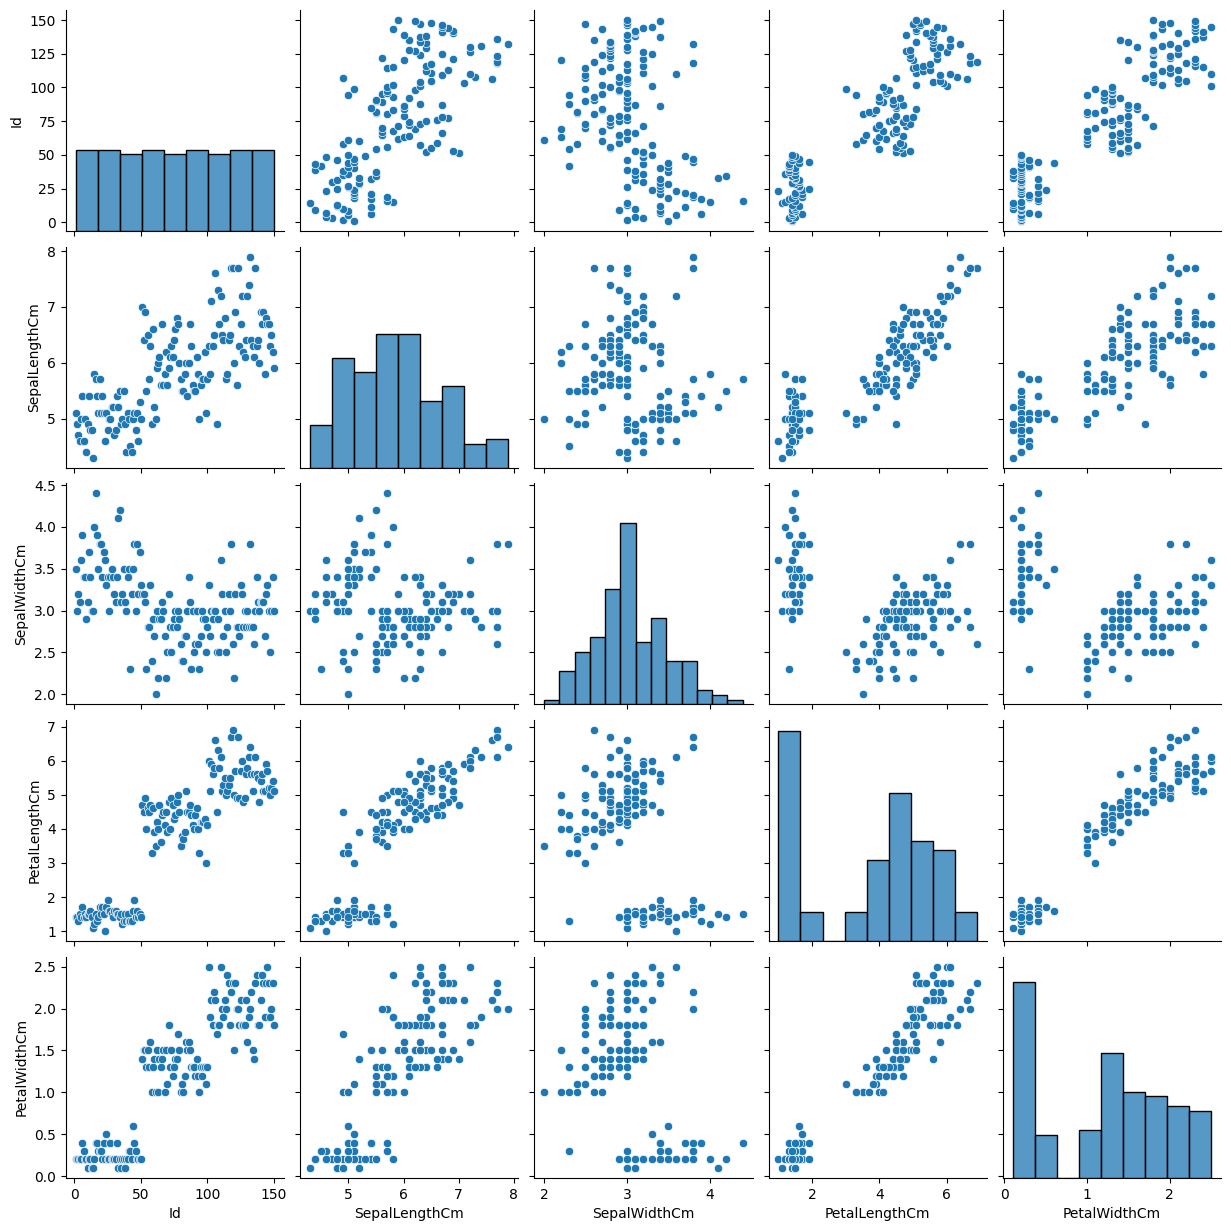

In [77]:
import seaborn as sns
sns.pairplot(data2)

As apparent, there is no label assigned to these entries

**Therefore let us try to Cluster the data to see any similarities**

**Import KMeans from sklearn**

In [78]:
from sklearn.cluster import KMeans

**Perform K Means Clustering**

In [80]:
kmeans = KMeans(n_clusters=3, random_state=42)

df = data2.drop(columns=["Species"])

kmeans.fit(df)


KMeans(n_clusters=3, random_state=42)

**Add cluster labels to the DataFrame**

In [81]:

cluster_labels = kmeans.labels_
data2['Cluster'] = cluster_labels

**Analyse the clusters, find the centers and the number of observations in each cluster**

In [82]:
cluster_centers = kmeans.cluster_centers_
cluster_counts = data2['Cluster'].value_counts()

print("Cluster Centers:")
print(cluster_centers)

print("Number of Observations in Each Cluster:")
print(cluster_counts)

Cluster Centers:
[[ 74.5          5.922        2.78         4.206        1.304     ]
 [125.           6.57058824   2.97058824   5.52352941   2.01176471]
 [ 25.           5.00612245   3.42040816   1.46530612   0.24489796]]
Number of Observations in Each Cluster:
Cluster
1    51
0    50
2    49
Name: count, dtype: int64


**Visualise the cluster, make the plot again but this time with labels**

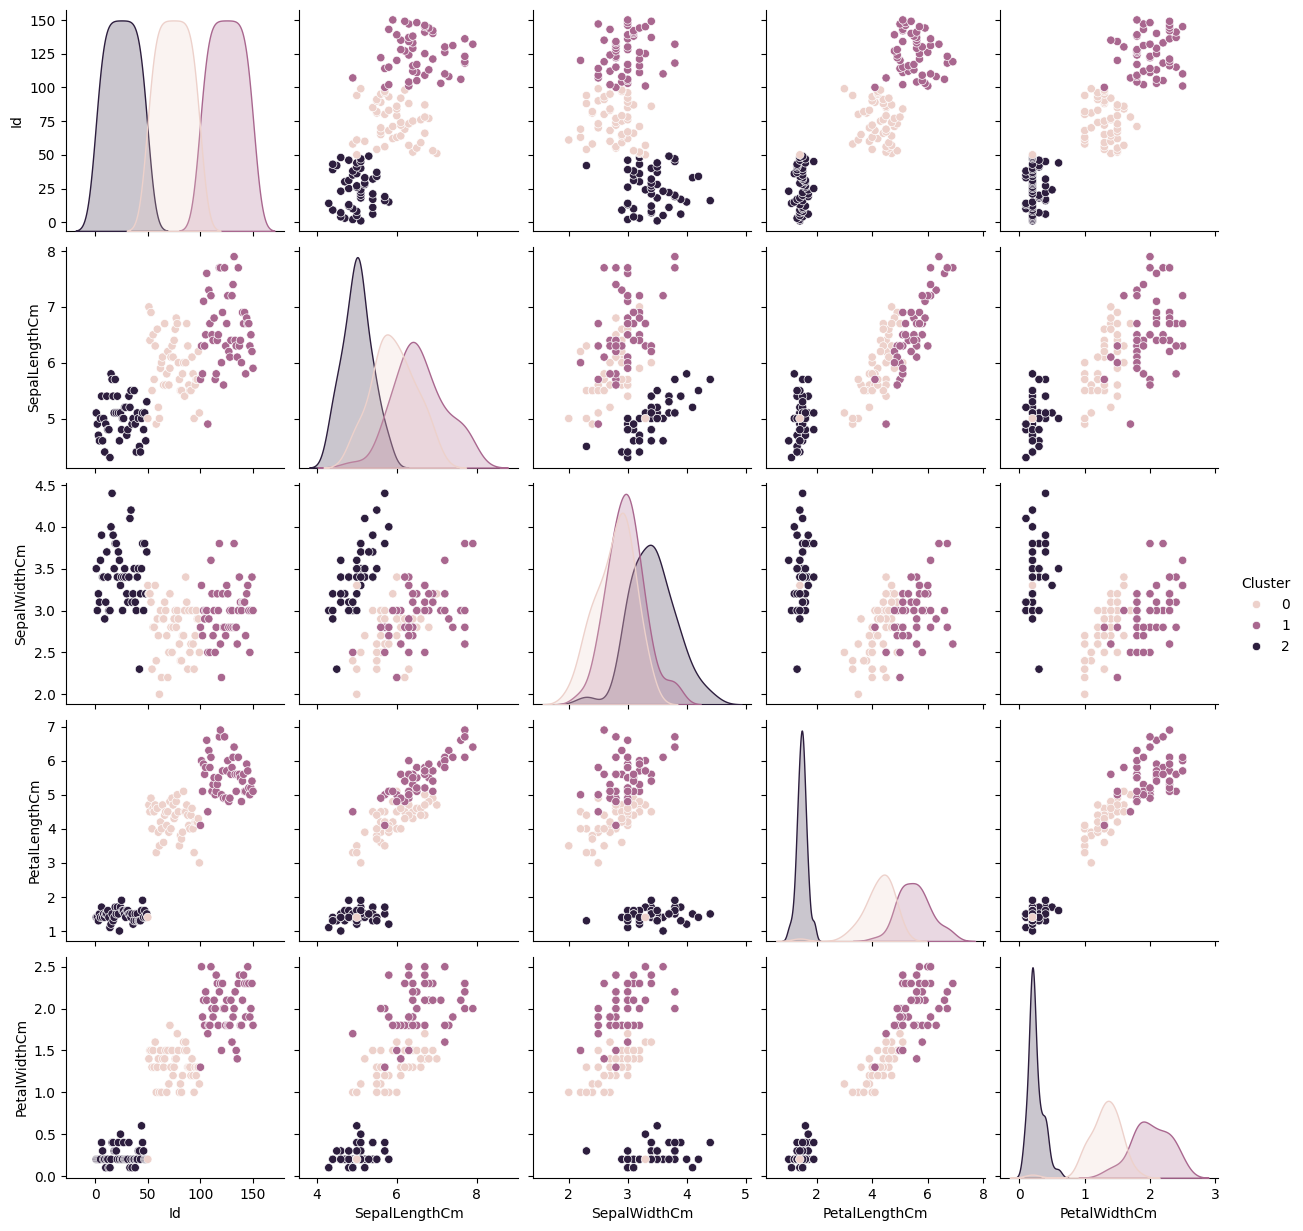

In [83]:
sns.pairplot(data2, hue='Cluster')


# GOOD JOB!